<center><font color='E6E6FA'><h1>EVANGELION UNIT-02 | AIC-2273</h1></font><center>
<center>
<img src="https://i.pinimg.com/originals/d3/a0/c0/d3a0c011ef7be54b360cb0b6b8c115ca.gif" width=500>
</center>

Eesha Tariq - AbdurRehman Haroon - Aliyan Ahmed

<center><b>SOFTEC AIC 2024 TASK</b>

Provided with a dataset of labeled microscopic images categorized into two classes: "Mitotic" and "Normal" cells, the competition required us to develop a model which can accurately predict the classes of an unseen dataset.
</center>


---

### <font color='E6E6FA'><h3>Table of Contents</h3><font><a class='anchor' id='top'></a>
- [Overview](#Overview)
- [Installations](#Installations)
- [Imports](#Imports)
- [Reading Image Dataset](#reading_image_dataset)
- [Helper Routines](#Helper_Routines)
- [Data Augmentation](#Image_Augmentation)
- [Preprocessing](#preprocessing)
- [Image Labels](#image_labels)
- [VGG-19 Model](#vgg-19_model)
- [Accuracy and Loss Graph](#Accuracy_and_Loss_graphs)
- [ROC Curve](#roc_curve)
- [Parameters](#parameters)
- [Testing](#testing)

---

# Overview

- The training dataset consists of 66 images

- The training labels mention the image file name and the corresponding labels ('Mitosis' or 'Normal')

- The test data consists of 99 images, all unlabeled

- OpenCV is used for most of the image reading, resising and preprocessing. To know more about what OpenCV does, refer the link: https://docs.opencv.org/4.x/index.html

- MultiOtsu is the primary preprocessing method used. To learn more about MultiOtsu, visit: https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_multiotsu.html

- Plotly (https://plotly.com/python/) is the most dynamic python plotting tool. We used Plotly to visualise our data. We also used some Matplotlib :)

- Using VGG-19, we trained our model. Our parameters for VGG-19 can be seen in the code. Here's the documentation for VGG-19: https://keras.io/api/applications/vgg/

---

# Installations

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install chart-studio

Note: you may need to restart the kernel to use updated packages.


---

# Imports

In [30]:
import os
import cv2
import glob
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from skimage import filters, color
from sklearn.preprocessing import LabelEncoder
import chart_studio.plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.offline.init_notebook_mode()
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.utils import to_categorical
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score

---

# Reading_Image_Dataset

In [2]:
def read_images(folder_path):
    images = []
    i = 0
    for img in folder_path:
        image = cv2.imread(img)
        images.append(image)
        i += 1
        print("Image file name:", img)
    return images, i


In [3]:
image_files = glob.glob('C:/Users/arhar/Downloads/softec24-final-round/Training Image/*.png')
images = []
count = 0
images, count = read_images(image_files)
print("Count of Images: ", count)

Image file name: C:/Users/arhar/Downloads/softec24-final-round/Training Image\0_1000.png
Image file name: C:/Users/arhar/Downloads/softec24-final-round/Training Image\0_2000.png
Image file name: C:/Users/arhar/Downloads/softec24-final-round/Training Image\0_3000.png
Image file name: C:/Users/arhar/Downloads/softec24-final-round/Training Image\0_4500.png
Image file name: C:/Users/arhar/Downloads/softec24-final-round/Training Image\0_500.png
Image file name: C:/Users/arhar/Downloads/softec24-final-round/Training Image\1000_0.png
Image file name: C:/Users/arhar/Downloads/softec24-final-round/Training Image\1000_1000.png
Image file name: C:/Users/arhar/Downloads/softec24-final-round/Training Image\1000_2000.png
Image file name: C:/Users/arhar/Downloads/softec24-final-round/Training Image\1000_2500.png
Image file name: C:/Users/arhar/Downloads/softec24-final-round/Training Image\1000_3500.png
Image file name: C:/Users/arhar/Downloads/softec24-final-round/Training Image\1000_5000.png
Image f

---

# Helper_Routines

Includes 

- ***save_images(images, folder_path)*** which saves a np.array of images in the desired path

- ***plot_ten_images(image)*** which plots the first ten images of the dataset

- ***plot_image_hist(image)*** which plots the histogram distribution of most of the dataset

In [4]:
def save_images(images, folder_path): # save the multiotsu pictures to desktop 
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    for i, img in enumerate(images):
        plt.imsave(os.path.join(folder_path, f'{i}.jpg'), img)

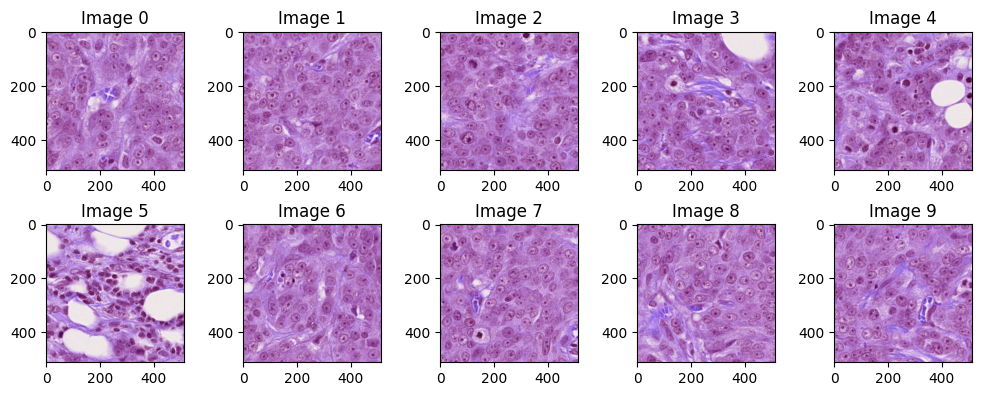

In [5]:
def plot_ten_images(image):
    fig, axs = plt.subplots(2, 5, figsize=(10, 4))
    axs = axs.ravel()
    for i in range(0, 10):    
        axs[i].imshow(image[i])
        axs[i].title.set_text(f'Image {i}')
    plt.tight_layout()
    plt.show()

plot_ten_images(images)


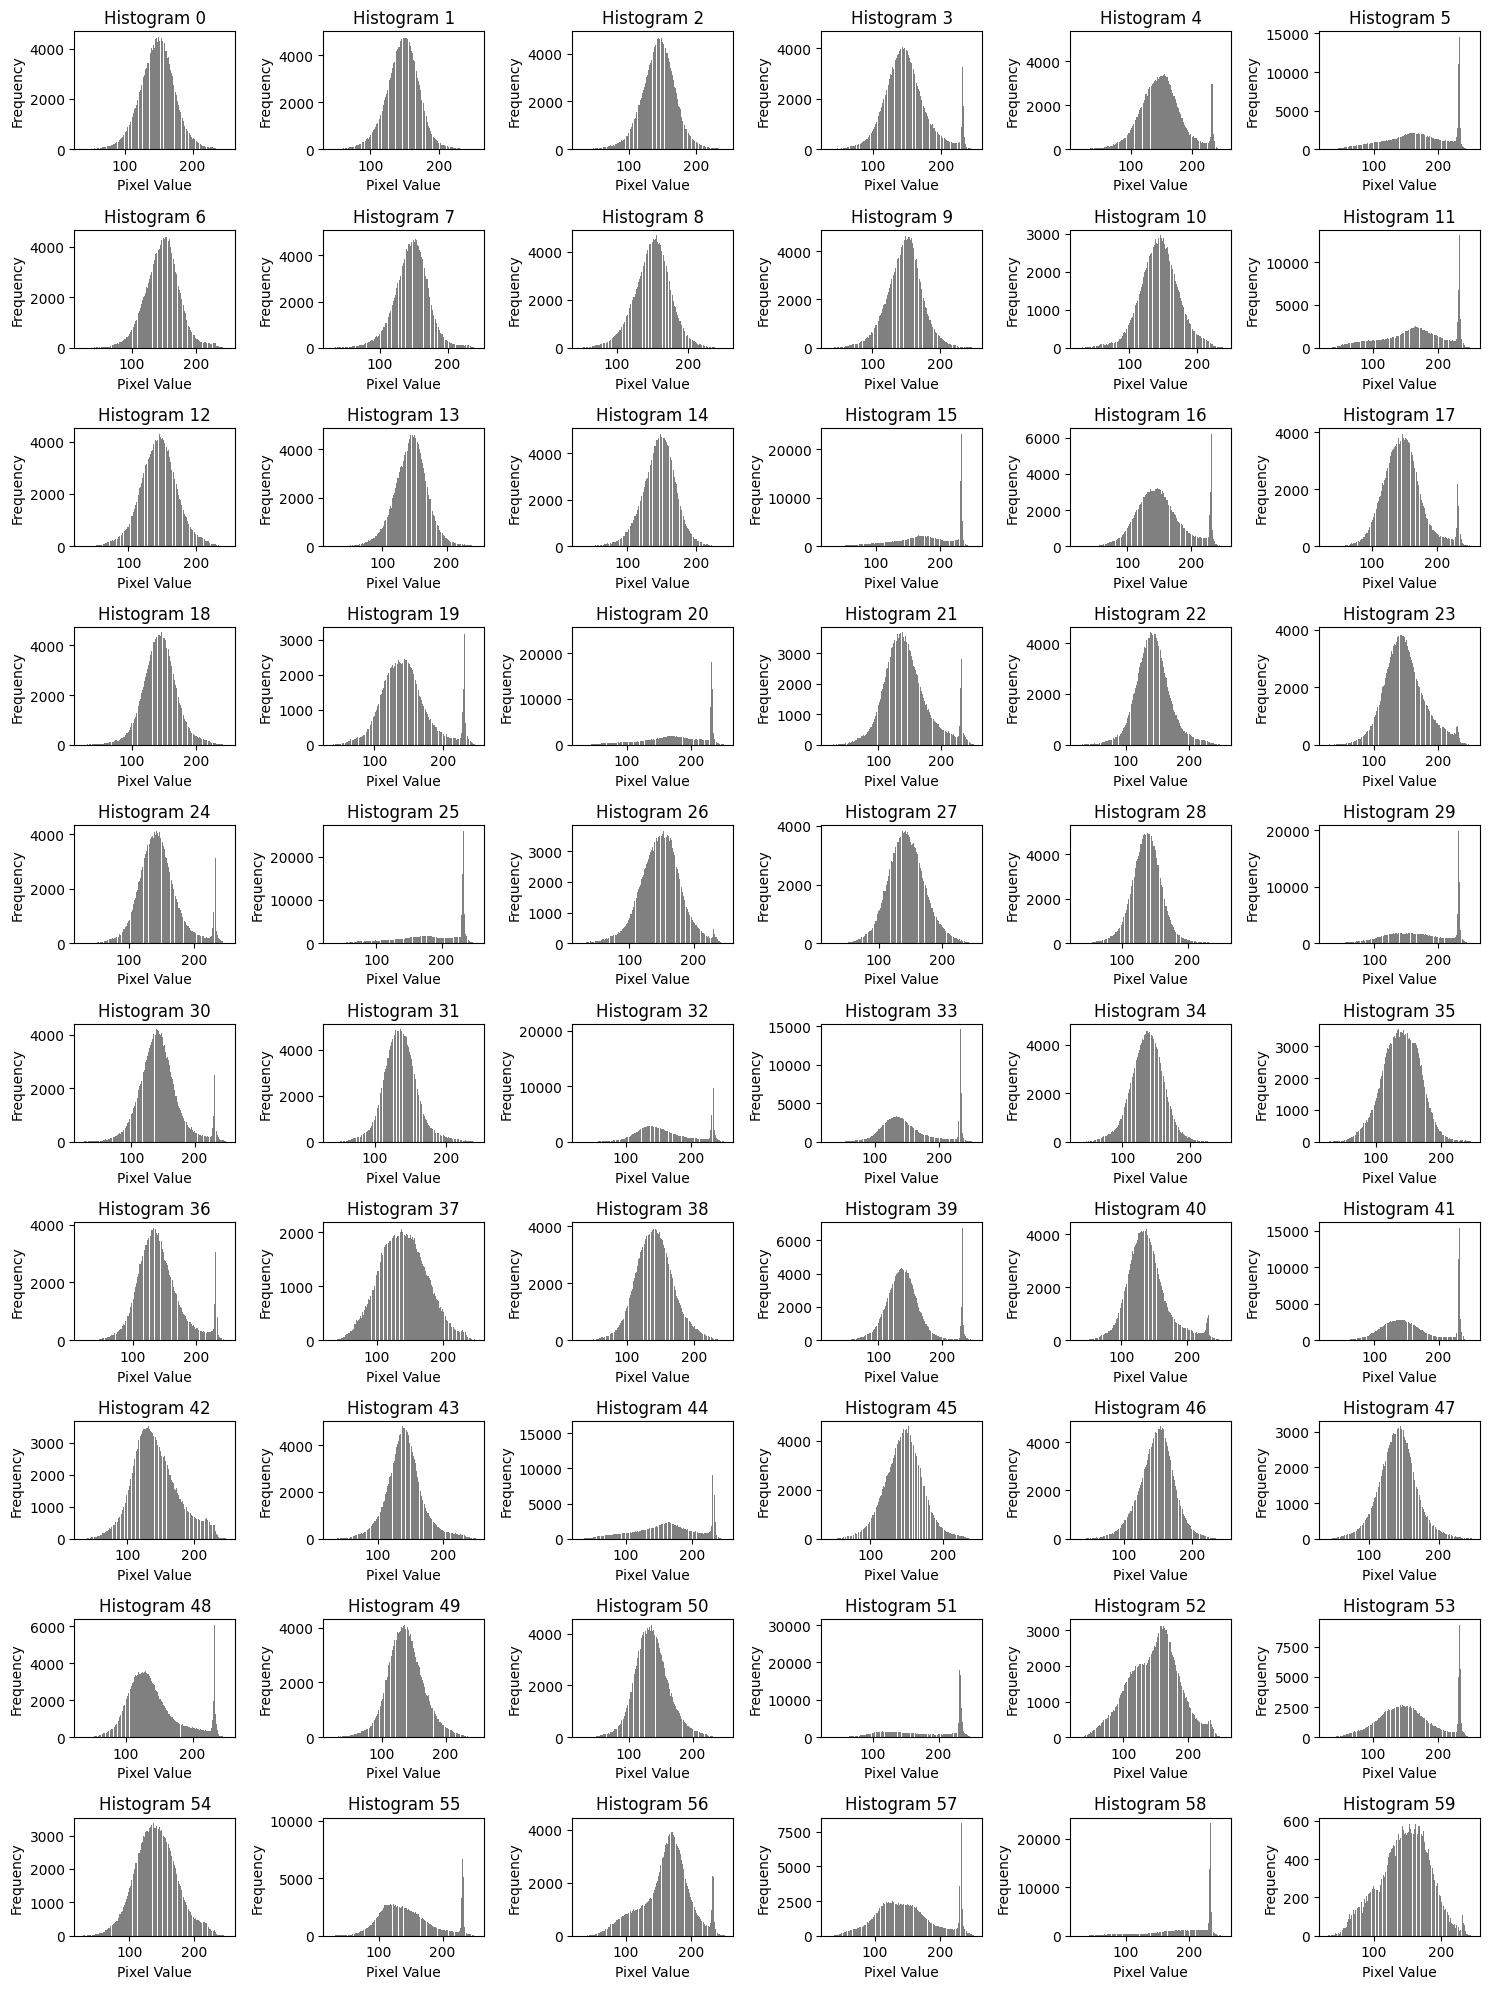

In [7]:
def plot_image_hist(image): # i plota da histogram
    fig, axis = plt.subplots(10, 6, figsize=(15, 20))
    for i, ax in enumerate(axis.flatten()):
        gray_image = cv2.cvtColor(image[i], cv2.COLOR_BGR2GRAY)
        gray_image_arr = gray_image.flatten()
        ax.hist(gray_image_arr, bins=256, color='gray')
        ax.set_title(f'Histogram {i}')
        ax.set_xlabel('Pixel Value')
        ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_image_hist(images)

---

# Image_Augmentation

In [6]:
def resize_images(image_list): # i resizea da picture
    resized_images = []
    for img in image_list:
        
        img = cv2.resize(img, (224, 224))
        resized_images.append(img)
    return resized_images

In [7]:
def augmentation(images):
    mirrored_images = [] # i creata da dups

    for img in images:
        mirrored_img = cv2.flip(img, 1)
        mirrored_images.append(mirrored_img)

    return mirrored_images    

In [8]:
resized_images=resize_images(images)
augmented_images=augmentation(resized_images)

In [9]:
#combining the images
imgs = np.concatenate((resized_images, augmented_images), axis=0)
len(imgs)

132

# Preprocessing

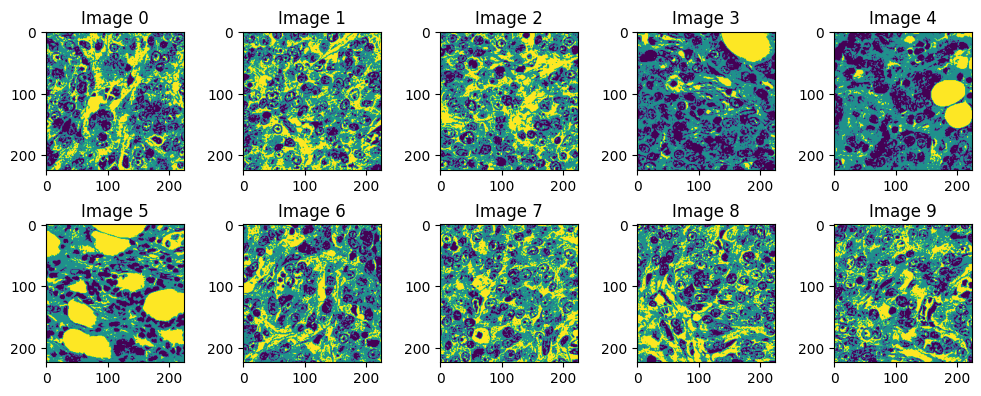

In [10]:
def multiotsu_filter(images): # i senda thru filter 2 - 2D image aata toh
    multiotsu = []
    for img in images:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image_gray = color.rgb2gray(img_rgb)
        thresholds = filters.threshold_multiotsu(image_gray)
        regions = np.digitize(image_gray, bins=thresholds)
        multiotsu.append(regions)
    return multiotsu

multiotsu = multiotsu_filter(imgs)
plot_ten_images(multiotsu)


In [12]:
save_images(multiotsu,'C:/Users/arhar/OneDrive/Desktop/msres') # saving images

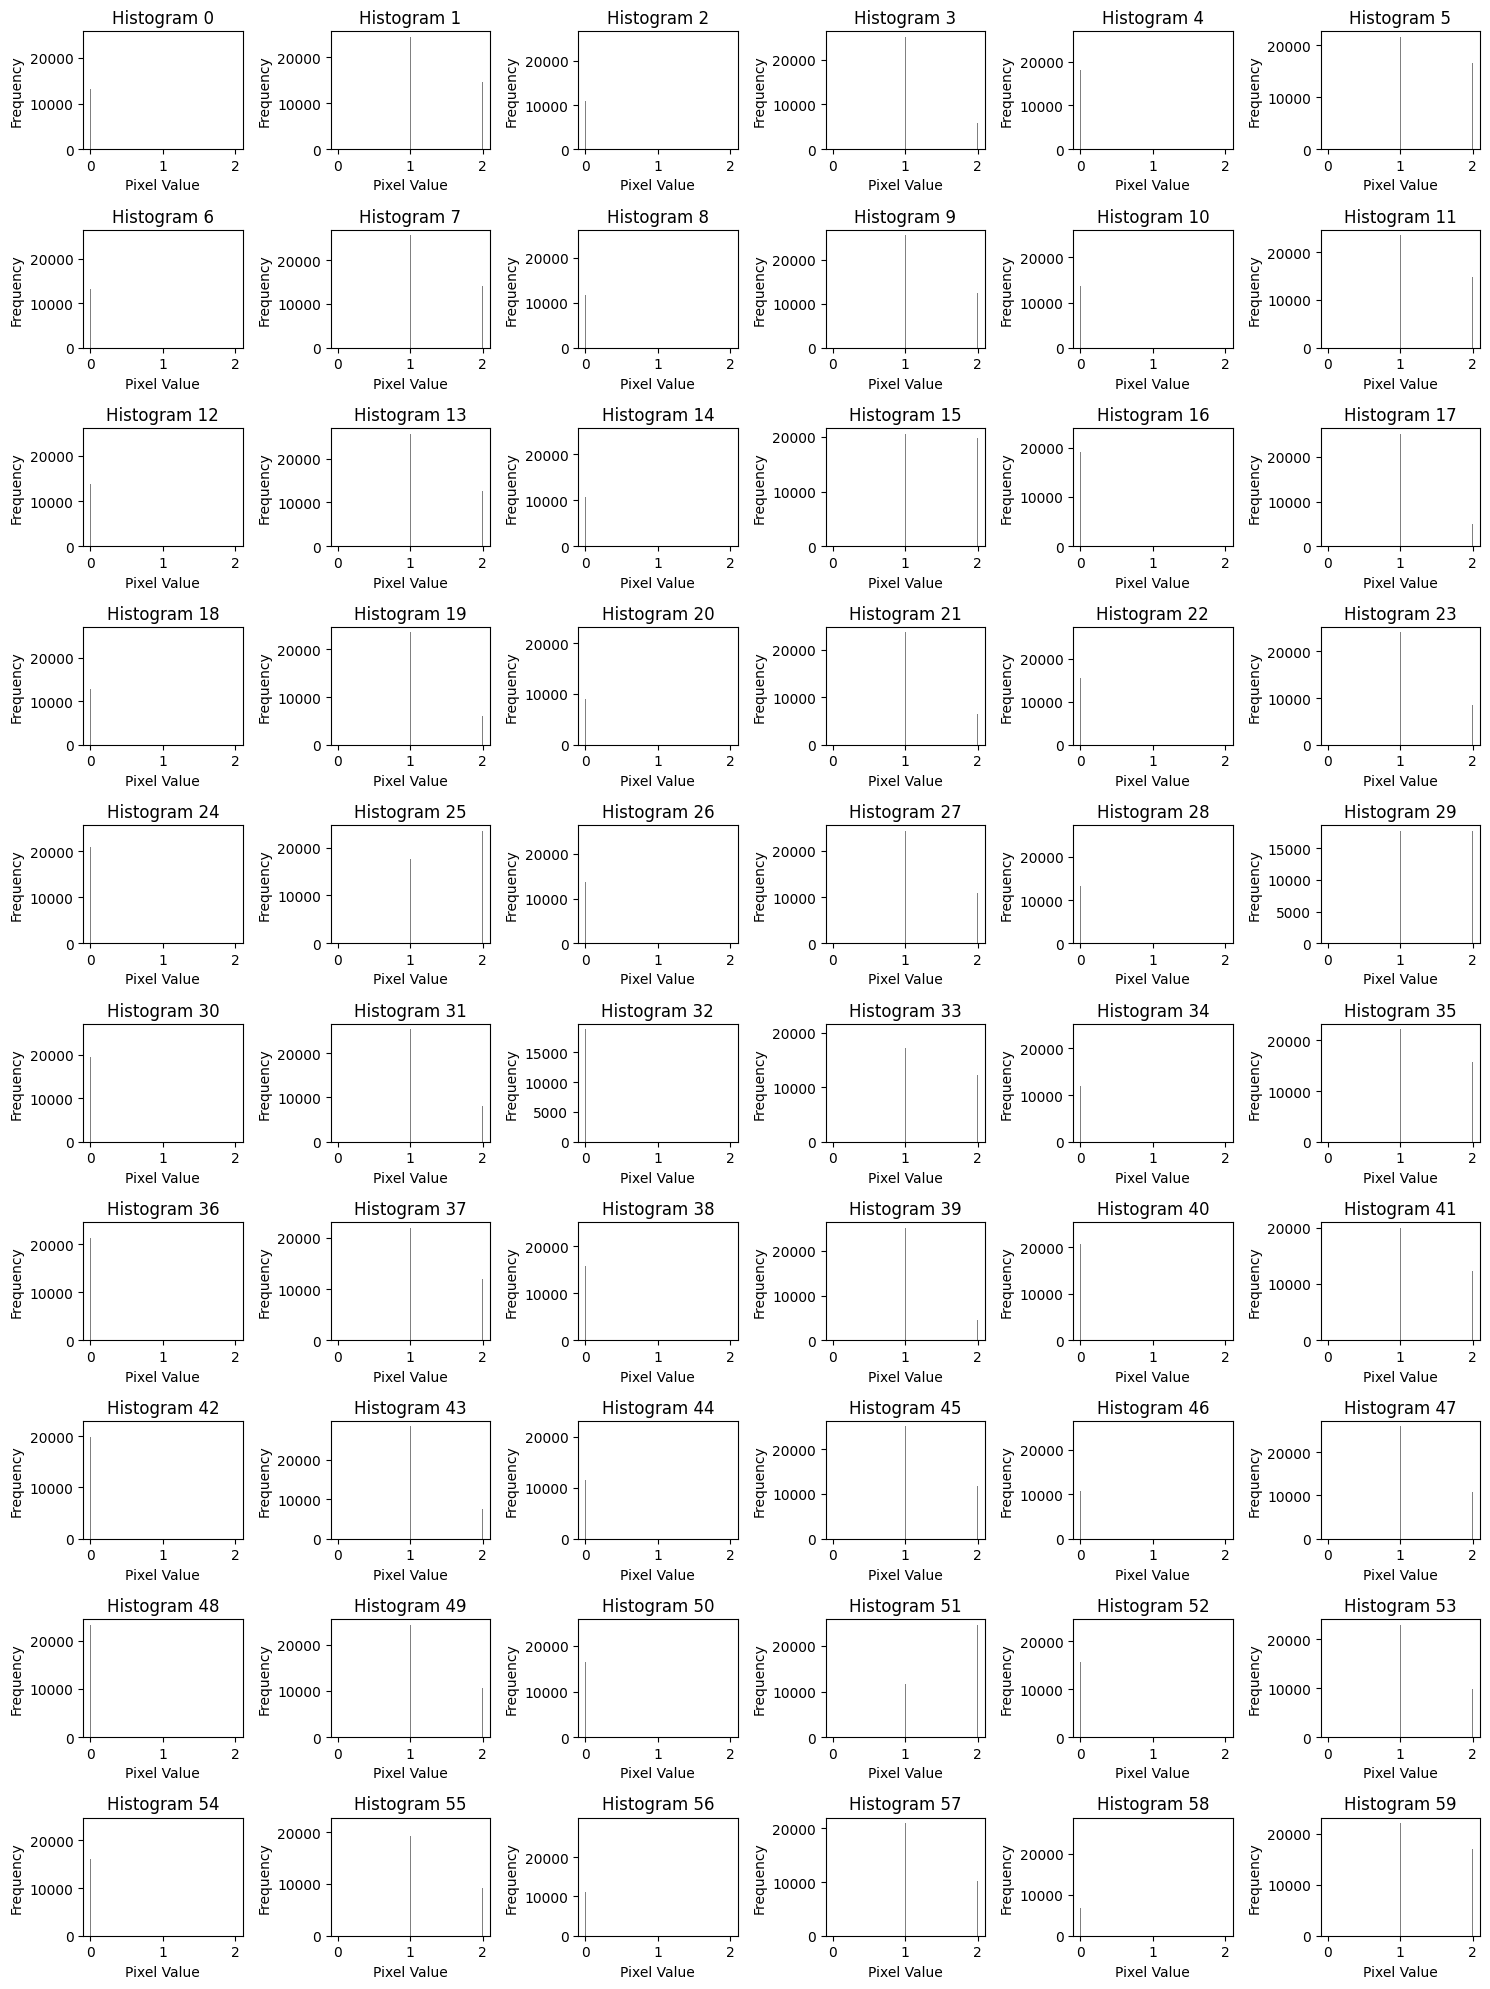

In [28]:
def plot_image_hist_nogs(images):
    fig, axis = plt.subplots(10, 6, figsize=(15, 20))
    for i, ax in enumerate(axis.flatten()):
        gray_image_arr = images[i].flatten()
        ax.hist(gray_image_arr, bins=256, color='gray')
        ax.set_title(f"Histogram {i}")
        ax.set_xlabel('Pixel Value')
        ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.show()

plot_image_hist_nogs(multiotsu)


---

# Image_Labels

In [13]:
df = pd.read_csv("C:/Users/arhar/Downloads/softec24-final-round/Training.csv") # read the image labels dataset
df.head(5)

Image    Label
0     0_1000.png   Normal
1  3000_3500.png  Mitosis
2  6500_4000.png  Mitosis
3  7000_2500.png  Mitosis
4  2000_2500.png  Mitosis

In [14]:
df = df.sort_values(by=['Image'], ascending=True) # sorting values due to OpenCV's weird obessession with autosort
df.head(5)

Image   Label
0   0_1000.png  Normal
11  0_2000.png  Normal
50  0_3000.png  Normal
57  0_4500.png  Normal
31   0_500.png  Normal

In [15]:
df['Label'].isna().sum() # checking for null values

0

In [16]:
df['Label'].unique() # checking for anomalies in class values

array(['Normal', 'Mitosis'], dtype=object)

In [17]:
print('Normal count:', df[df['Label'] == 'Normal'].count()) # counting number of normal
print('Mitosis count:', df[df['Label'] == 'Mitosis'].count()) # counting number of mitosis

Normal count: Image    27
Label    27
dtype: int64
Mitosis count: Image    39
Label    39
dtype: int64


In [18]:
le = LabelEncoder() # encoding the dataset (1 is mitosis, 0 is normal)
df['Label'] = le.fit_transform(df['Label']) 
df['Label'].unique() 

array([1, 0])

In [19]:
temp_arr = np.array(df['Label']) # duplicating the labels because of data augmentation
labels = np.concatenate((temp_arr, df['Label']), axis=0)
print(len(labels))

132


In [20]:
classes = to_categorical(labels) # for training
len(classes)

132

In [21]:
unique_labels, counts = np.unique(labels, return_counts=True) # visualising the label distribution

colors = ['#A020F0', '#0E6E6FA']

fig = {'data' : [{'type' : 'pie',
                  'name' : "Patients by Gender: Pie chart",
                  'values' : counts,
                  'labels' : unique_labels,
                  'direction' : 'clockwise',
                  'marker' : {'colors' : colors}}], 
       'layout' : {'title' : 'Mitosis (1) vs Normal (0)'}}

pyo.iplot(fig)


In [22]:
unique_labels, counts = np.unique(labels, return_counts=True)
bars = go.Bar(
    x=unique_labels,
    y=counts,
    name='Count of Mitosis'
)

data = [bars]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout={'title' : 'Normal (0) vs Mitosis (1)'})
pyo.iplot(fig, filename='grouped-bar')

---

# VGG-19_Model

In [37]:
ms_resized = np.array([resize(img, (224, 224, 3)) for img in imgs])

X_train, X_test, y_train, y_test = train_test_split(ms_resized, classes, test_size=0.2, random_state=42) #0.3 test size best 

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = Flatten()(x)
predictions = Dense(2, activation='softmax')(x)
model_vgg19 = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model_vgg19.compile(optimizer=Adam(learning_rate=0.0004), loss='categorical_crossentropy', metrics=['accuracy']) #0.0003 accuracy best i tried alot of them


early_stopping = EarlyStopping(monitor='val_accuracy', patience=5) # to reduce overfitting


history = model_vgg19.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=32,callbacks=[early_stopping])


Epoch 1/15
4/4 [==============================] - 10s 2s/step - loss: 0.7527 - accuracy: 0.5714 - val_loss: 0.8466 - val_accuracy: 0.3704
Epoch 2/15
4/4 [==============================] - 8s 2s/step - loss: 0.5572 - accuracy: 0.6857 - val_loss: 0.4307 - val_accuracy: 0.8148
Epoch 3/15
4/4 [==============================] - 8s 2s/step - loss: 0.4649 - accuracy: 0.7524 - val_loss: 0.8120 - val_accuracy: 0.7037
Epoch 4/15
4/4 [==============================] - 8s 2s/step - loss: 0.4024 - accuracy: 0.8286 - val_loss: 0.5282 - val_accuracy: 0.7778
Epoch 5/15
4/4 [==============================] - 8s 2s/step - loss: 0.3720 - accuracy: 0.8476 - val_loss: 0.5479 - val_accuracy: 0.7778
Epoch 6/15
4/4 [==============================] - 8s 2s/step - loss: 0.3134 - accuracy: 0.8762 - val_loss: 0.7787 - val_accuracy: 0.7407
Epoch 7/15
4/4 [==============================] - 8s 2s/step - loss: 0.2680 - accuracy: 0.9048 - val_loss: 0.6438 - val_accuracy: 0.7778


---

# Accuracy_and_Loss_graphs

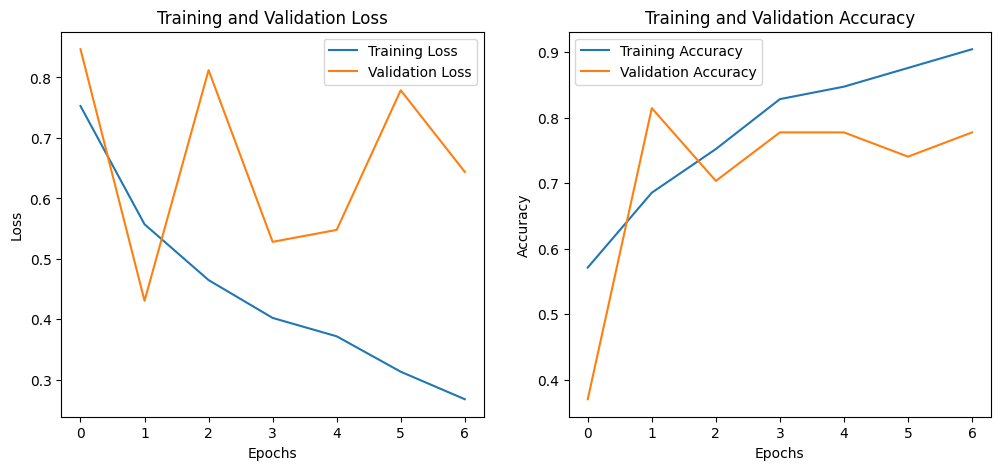

In [40]:
def plot_training_history(history): # made this plot to determine the best learning rate and test size the smoother and less jumpy the graph the better

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    

    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label='Training Accuracy')
    plt.plot(val_accuracy, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()


plot_training_history(history)   


# ROC_Curve

In [41]:
import plotly.graph_objects as go
from sklearn.metrics import roc_curve, auc

y_probs = model_vgg19.predict(X_test)
y_probs = y_probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test[:, 1], y_probs)
roc_auc = auc(fpr, tpr)

trace0 = go.Scatter(x=fpr, y=tpr, mode='lines', name='ROC curve (area = %0.2f)' % roc_auc)
trace1 = go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random', line={'dash': 'dash'})

layout = go.Layout(title='ROC Curve',
                   xaxis={'title':'FPR'},
                   yaxis={'title':'TPR'},
                   showlegend=True)

fig = go.Figure(data=[trace0, trace1], layout=layout)

fig.show()


1/1 [==============================] - 2s 2s/step


---

# Parameters

In [42]:
# Calculate precision, recall, and F1 score
y_probs = model_vgg19.predict(X_test)
y_probs = y_probs[:, 1]
threshold = 0.5
y_pred = np.where(y_probs > threshold, 1, 0)

precision = precision_score(np.argmax(y_test, axis=1), y_pred)
recall = recall_score(np.argmax(y_test, axis=1), y_pred)
f1 = f1_score(np.argmax(y_test, axis=1), y_pred)


1/1 [==============================] - 2s 2s/step


In [43]:

fig = go.Figure(data=[go.Bar(
    x=['Precision', 'Recall', 'F1 Score'],
    y=[precision, recall, f1],
    marker_color=['blue', 'green', 'orange']
)])

fig.update_layout(title='Precision, Recall, and F1 Score',
                  xaxis_title='Metric',
                  yaxis_title='Score')

fig.show()

---

# Testing

In [44]:
image_files = glob.glob('C:/Users/arhar/Downloads/softec24-final-round/Testing Image/*.png')

test = []
i = 0
for img in image_files:
    image = cv2.imread(img)
    test.append(image)
    i += 1
    print("Image file name:", img)

print("Count of images: ", i)


Image file name: C:/Users/arhar/Downloads/softec24-final-round/Testing Image\0_0.png
Image file name: C:/Users/arhar/Downloads/softec24-final-round/Testing Image\0_1500.png
Image file name: C:/Users/arhar/Downloads/softec24-final-round/Testing Image\0_2500.png
Image file name: C:/Users/arhar/Downloads/softec24-final-round/Testing Image\0_3500.png
Image file name: C:/Users/arhar/Downloads/softec24-final-round/Testing Image\0_4000.png
Image file name: C:/Users/arhar/Downloads/softec24-final-round/Testing Image\0_5000.png
Image file name: C:/Users/arhar/Downloads/softec24-final-round/Testing Image\1000_1500.png
Image file name: C:/Users/arhar/Downloads/softec24-final-round/Testing Image\1000_3000.png
Image file name: C:/Users/arhar/Downloads/softec24-final-round/Testing Image\1000_4000.png
Image file name: C:/Users/arhar/Downloads/softec24-final-round/Testing Image\1000_4500.png
Image file name: C:/Users/arhar/Downloads/softec24-final-round/Testing Image\1000_500.png
Image file name: C:/U

In [45]:
img_names = []
for file in image_files:
    name = file.split('\\')[1]
    img_names.append(name)

print(img_names)


['0_0.png', '0_1500.png', '0_2500.png', '0_3500.png', '0_4000.png', '0_5000.png', '1000_1500.png', '1000_3000.png', '1000_4000.png', '1000_4500.png', '1000_500.png', '1500_2000.png', '1500_2500.png', '1500_3500.png', '1500_4000.png', '1500_4500.png', '1500_500.png', '1500_5000.png', '2000_1500.png', '2000_3000.png', '2000_3500.png', '2000_4000.png', '2000_4500.png', '2000_500.png', '2500_1500.png', '2500_2000.png', '2500_3000.png', '2500_4500.png', '2500_500.png', '2500_5000.png', '3000_1000.png', '3000_2000.png', '3000_2500.png', '3000_4000.png', '3000_4500.png', '3000_500.png', '3000_5000.png', '3500_1000.png', '3500_2000.png', '3500_2500.png', '3500_3000.png', '3500_3500.png', '3500_4000.png', '3500_5000.png', '4000_1000.png', '4000_1500.png', '4000_2000.png', '4000_2500.png', '4000_3000.png', '4000_500.png', '4500_0.png', '4500_2000.png', '4500_2500.png', '4500_4000.png', '4500_500.png', '4500_5000.png', '5000_0.png', '5000_1000.png', '5000_2000.png', '5000_2500.png', '5000_3000.pn

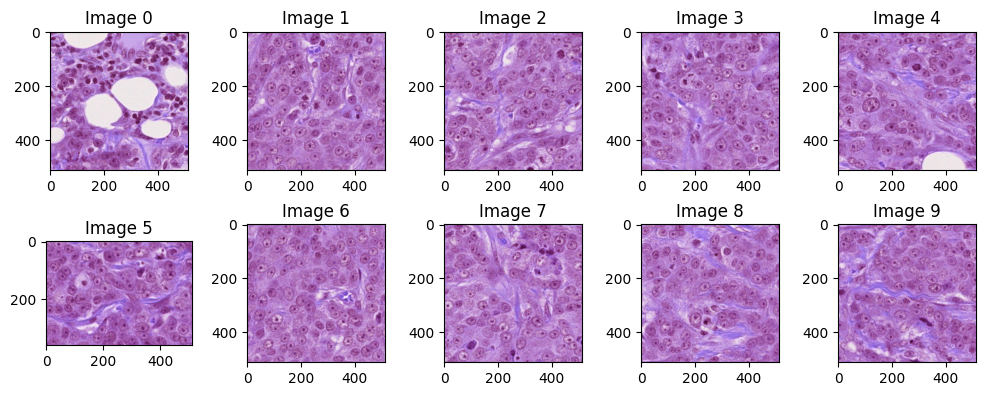

In [46]:
plot_ten_images(test)

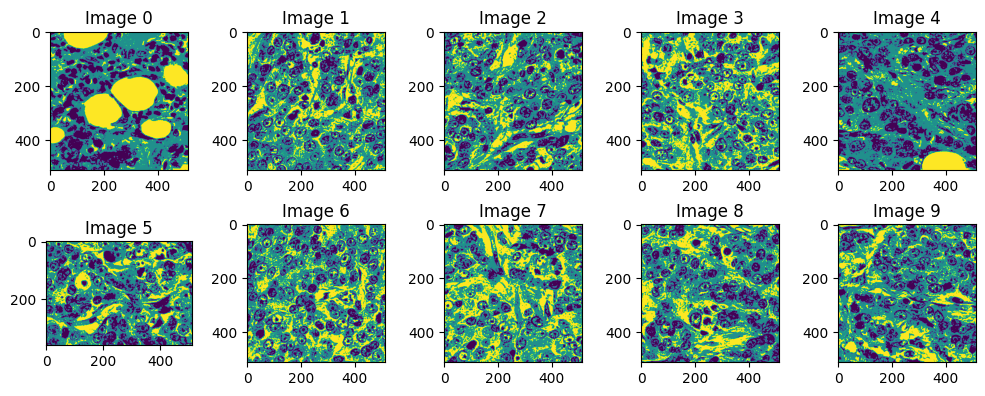

In [47]:
test_ms = multiotsu_filter(test)
plot_ten_images(test_ms)

In [48]:
def save_images(images, folder_path):
    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    n = 0
    for i, img in enumerate(images):
        plt.imsave(os.path.join(folder_path, f'{n}.jpg'), img)
        n+=1

# Use the function
save_images(test_ms, 'C:/Users/arhar/OneDrive/Desktop/testms')

path = os.path.join("C:/Users/arhar/OneDrive/Desktop/testms")
ms = []
i = 0
while True:
    image_path = os.path.join(path, f'{i}.jpg')
    if not os.path.exists(image_path):
        break
    image = cv2.imread(image_path)
    ms.append(image)
    i += 1

In [49]:
print("Count of images: ", i)

Count of images:  99


In [50]:
test_data_resized = np.array([resize(img, (224, 224, 3)) for img in test])

predictions = model_vgg19.predict(test_data_resized)

classes = np.argmax(predictions, axis=1)


4/4 [==============================] - 7s 2s/step


In [51]:
print(classes)

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1
 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1]


In [52]:
df_existing = pd.read_csv("C:/Users/arhar/Downloads/softec24-final-round//Testing.csv")
df_existing.head()

Image
0  4000_1000.png
1  2000_3500.png
2  5500_2500.png
3  1000_4500.png
4  2500_2000.png

In [53]:
df_sorted = df_existing.sort_values("Image")
df_sorted.head()

Image
69     0_0.png
30  0_1500.png
35  0_2500.png
32  0_3500.png
31  0_4000.png

In [54]:
predicted_classes = classes
df = pd.read_csv("C:/Users/arhar/Downloads/softec24-final-round//Testing.csv")

dict = {'Image': img_names, 'Label': predicted_classes} 
df_pred = pd.DataFrame(dict)

df = pd.merge(df, df_pred, on='Image', how='left')

In [55]:
df.head()

Image  Label
0  4000_1000.png      0
1  2000_3500.png      0
2  5500_2500.png      0
3  1000_4500.png      0
4  2500_2000.png      0

In [56]:
classes = df['Label'].to_list()

In [57]:
classes = ['Mitosis' if c == 0 else 'Normal' for c in classes]
# Create a DataFrame
df_new = pd.DataFrame({
    'Image': df['Image'],
    'Label': classes
})

# Write DataFrame to CSV
df_new.to_csv('Test.csv', index=False)


In [58]:
mitosis = df_new['Label'].value_counts().get(0, 0)
normal = df_new['Label'].value_counts().get(1, 0)

colors = ['#A020F0', '#00FFFF']

fig = {'data' : [{'type' : 'pie',
                  'name' : "Patients by Gender: Pie chart",
                 'values' : df_new['Label'].value_counts().values,
                 'labels' : df_new['Label'].value_counts().index,
                 'direction' : 'clockwise',
                 'marker' : {'colors' : ['##A020F0', '#00FFFF']}}], 'layout' : {'title' : 'Predicted Mitosis vs Normal'}}

pyo.iplot(fig)

C:\Users\arhar\AppData\Local\Temp\ipykernel_2676\1521780940.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\arhar\AppData\Local\Temp\ipykernel_2676\1521780940.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



---